# 모듈

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tqdm import tqdm
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# 시드고정
np.random.seed(7)
random.seed(7)
tf.random.set_seed(7)

# EDA

In [3]:
# to be continued...

In [4]:
# y끼리 상관계수 살펴보기

# 데이터 전처리

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
# 특성별로 column 구분하기

temp = train[['X00', 'X07', 'X28', 'X31', 'X32']]
press = train[['X01', 'X06', 'X22', 'X27', 'X29']]                  
wind_speed = train[['X02', 'X03', 'X18', 'X24', 'X26']]       
accum_precipitation = train[['X04', 'X10', 'X21', 'X36', 'X39']]     
baro_press = train[['X05', 'X08', 'X09', 'X23', 'X33']]             
accum_sun = train[['X11','X14','X16','X19','X34']]          
humidity = train[['X12', 'X20', 'X30', 'X37', 'X38']]
wind_direction = train[['X13', 'X15', 'X17', 'X25', 'X35']]
y_temperature = train[['Y00','Y01','Y02','Y03','Y04','Y05','Y06',
                            'Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14',
                            'Y15','Y16','Y17','Y18']]

In [7]:
# column renaming
temp.rename({'X00':'temp1','X07':'temp2','X28':'temp3','X31':'temp4','X32':'temp5'}, axis=1, inplace=True)
press.rename({'X01':'press1','X06':'press2','X22':'press3','X27':'press4','X29':'press5'}, axis=1, inplace=True)
wind_speed.rename({'X02':'wind_speed1','X03':'wind_speed2','X18':'wind_speed3','X24':'wind_speed4','X26':'wind_speed5'}, axis=1, inplace=True)
accum_precipitation.rename({'X04':'accum_precipitation1','X10':'accum_precipitation2','X21':'accum_precipitation3','X36':'accum_precipitation4','X39':'accum_precipitation5'}, axis=1, inplace=True)
baro_press.rename({'X05':'baro_press1','X08':'baro_press2','X09':'baro_press3','X23':'baro_press4','X33':'baro_press5'}, axis=1, inplace=True)
accum_sun.rename({'X11':'accum_sun1','X14':'accum_sun2','X16':'accum_sun3','X19':'accum_sun4','X34':'accum_sun5'}, axis=1, inplace=True)
humidity.rename({'X12':'humidity1','X20':'humidity2','X30':'humidity3','X37':'humidity4','X38':'humidity5'}, axis=1, inplace=True)
wind_direction.rename({'X13':'wind_direction1','X15':'wind_direction2','X17':'wind_direction3','X25':'wind_direction4','X35':'wind_direction5'}, axis=1, inplace=True)

C:\Users\Shin\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [8]:
# train으로 합치기
train=pd.DataFrame()
train=pd.concat([temp, press, wind_speed, accum_precipitation, baro_press, accum_sun, humidity, wind_direction, y_temperature], axis=1)

In [9]:
# test도 동일적용

temp = test[['X00', 'X07', 'X28', 'X31', 'X32']]
press = test[['X01', 'X06', 'X22', 'X27', 'X29']]                  #
wind_speed = test[['X02', 'X03', 'X18', 'X24', 'X26']]       
accum_precipitation = test[['X04', 'X10', 'X21', 'X36', 'X39']]     
baro_press = test[['X05', 'X08', 'X09', 'X23', 'X33']]             #
accum_sun = test[['X11','X14','X16','X19','X34']]          
humidity = test[['X12', 'X20', 'X30', 'X37', 'X38']]
wind_direction = test[['X13', 'X15', 'X17', 'X25', 'X35']]

In [10]:
# column renaming

temp.rename({'X00':'temp1','X07':'temp2','X28':'temp3','X31':'temp4','X32':'temp5'}, axis=1, inplace=True)
press.rename({'X01':'press1','X06':'press2','X22':'press3','X27':'press4','X29':'press5'}, axis=1, inplace=True)
wind_speed.rename({'X02':'wind_speed1','X03':'wind_speed2','X18':'wind_speed3','X24':'wind_speed4','X26':'wind_speed5'}, axis=1, inplace=True)
accum_precipitation.rename({'X04':'accum_precipitation1','X10':'accum_precipitation2','X21':'accum_precipitation3','X36':'accum_precipitation4','X39':'accum_precipitation5'}, axis=1, inplace=True)
baro_press.rename({'X05':'baro_press1','X08':'baro_press2','X09':'baro_press3','X23':'baro_press4','X33':'baro_press5'}, axis=1, inplace=True)
accum_sun.rename({'X11':'accum_sun1','X14':'accum_sun2','X16':'accum_sun3','X19':'accum_sun4','X34':'accum_sun5'}, axis=1, inplace=True)
humidity.rename({'X12':'humidity1','X20':'humidity2','X30':'humidity3','X37':'humidity4','X38':'humidity5'}, axis=1, inplace=True)
wind_direction.rename({'X13':'wind_direction1','X15':'wind_direction2','X17':'wind_direction3','X25':'wind_direction4','X35':'wind_direction5'}, axis=1, inplace=True)

In [11]:
# test로 합치기

test=pd.DataFrame()
test=pd.concat([temp, press, wind_speed, accum_precipitation, baro_press, accum_sun, humidity, wind_direction], axis=1)

In [12]:
# 요소 값이 0인 column 제거하기

train.drop(['accum_sun4', 'accum_sun3', 'accum_sun2'], axis=1, inplace=True)
test.drop(['accum_sun4', 'accum_sun3', 'accum_sun2'], axis=1, inplace=True)

In [13]:
# 관련없는 Y값 제거 후 renaming

train.drop(['Y00','Y03','Y04'], axis=1, inplace=True)
train=train.rename(columns={'Y01':'Y00', 'Y02':'Y01', 'Y05':'Y02', 'Y06':'Y03', 'Y07':'Y04', 'Y08':'Y05', 'Y09':'Y06', 'Y10':'Y07', 'Y11':'Y08', 'Y12':'Y09', 'Y13':'Y10', 'Y14':'Y11', 'Y15':'Y12', 'Y16':'Y13', 'Y17':'Y14', 'Y18':'Y15'})

In [14]:
# feature engineering을 위해 train_x, test_x 합치기
X_train=train.iloc[:, :-16]
concat_data=pd.concat([X_train, test], axis=0).reset_index()

# 피처 엔지니어링

In [15]:
# 데이터 확인
concat_data.head()

,index,temp1,temp2,temp3,temp4,temp5,press1,press2,press3,press4,...,humidity1,humidity2,humidity3,humidity4,humidity5,wind_direction1,wind_direction2,wind_direction3,wind_direction4,wind_direction5
0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,...,82.4,91.0,69.1,77.2,62.6,71.3,101.1,56.1,2.3,256.4
1,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,...,81.2,91.9,70.3,77.3,63.5,121.8,165.3,0.0,0.0,215.4
2,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,...,86.1,93.3,71.5,77.3,63.9,232.0,144.0,0.0,0.0,235.2
3,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,...,87.7,93.4,73.2,77.5,64.5,0.0,115.9,294.1,0.0,214.0
4,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,...,88.9,94.1,74.3,78.0,65.0,0.0,124.7,0.0,0.0,174.9


In [16]:
# 누적강수량 -> 일일강수량으로 바꾸기

accum_precipitation1=concat_data.accum_precipitation1
accum_precipitation2=concat_data.accum_precipitation2
accum_precipitation3=concat_data.accum_precipitation3
accum_precipitation4=concat_data.accum_precipitation4
accum_precipitation5=concat_data.accum_precipitation5

pre1=accum_precipitation1-accum_precipitation1.shift(1)
pre2=accum_precipitation2-accum_precipitation2.shift(1)
pre3=accum_precipitation3-accum_precipitation3.shift(1)
pre4=accum_precipitation4-accum_precipitation4.shift(1)
pre5=accum_precipitation5-accum_precipitation5.shift(1)
pre1[0]=0
pre2[0]=0
pre3[0]=0
pre4[0]=0
pre5[0]=0
lst=[pre1, pre2, pre3, pre4, pre5]
for i in lst:
    for j in range(len(i)):
        if i[j]<0:
            i[j]=0
            
concat_data['precipitation1']=pre1
concat_data['precipitation2']=pre2
concat_data['precipitation3']=pre3
concat_data['precipitation4']=pre4
concat_data['precipitation5']=pre5

In [17]:
# 누적일사량 -> 일일일사량으로 바꾸기

accum_sun1=concat_data.accum_sun1
accum_sun5=concat_data.accum_sun5

sun1=accum_sun1-accum_sun1.shift(1)
sun2=accum_sun5-accum_sun5.shift(1)
sun1[0]=0
sun2[0]=0
lst=[sun1, sun2]
for i in lst:
    for j in range(len(i)):
        if i[j]<0:
            i[j]=0
            
concat_data['sun1']=sun1
concat_data['sun2']=sun2

In [18]:
# 누적강수량, 누적일사량 제거
concat_data=concat_data.drop(['accum_precipitation1','accum_precipitation2','accum_precipitation3','accum_precipitation4','accum_precipitation5'
                  ,'accum_sun1', 'accum_sun5'], axis=1)

In [19]:
# id를 활용한 time 변수 만들기

'''
삼각함수에 대해서 다시 한 번 공부할 필요성이 생겼음.
'''

minute = (concat_data['index']%144).astype(int)
minute
hour= pd.Series((concat_data['index']%144/6).astype(int))
hour

min_in_day = 24*6
hour_in_day = 24

minute_sin = np.sin(np.pi*minute/min_in_day) 
hour_sin  = np.sin(np.pi*hour/hour_in_day)

minute_sin.name = 'minute'
hour_sin.name = 'hour'

In [20]:
# 데이터 합치기
concat_data = pd.concat([minute_sin, hour_sin, concat_data], axis = 1)

In [21]:
# 기압 제거? 기압이 왜 필요하지?
# 해면기압 -> 평균 , 현재기압 공식 차이를 구함 // 의미있나?

In [22]:
# 풍향 categorical하게 바꾸기 or 제거하기
concat_data.head()

,minute,hour,index,temp1,temp2,temp3,temp4,temp5,press1,press2,...,wind_direction3,wind_direction4,wind_direction5,precipitation1,precipitation2,precipitation3,precipitation4,precipitation5,sun1,sun2
0,0.000000,0.0,0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,...,56.1,2.3,256.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.021815,0.0,1,9.3,12.1,12.1,8.3,10.3,988.9,989.6,...,0.0,0.0,215.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.043619,0.0,2,9.4,12.1,12.1,8.0,9.7,989.0,989.7,...,0.0,0.0,235.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.065403,0.0,3,9.4,12.0,12.1,7.7,9.4,988.9,989.6,...,294.1,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.087156,0.0,4,9.2,12.0,12.0,7.4,9.4,988.9,989.7,...,0.0,0.0,174.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# 상관계수 파악하기?

# PCA

# 모델 생성

In [24]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
xgbr = xgb.XGBRegressor()

# 모델 훈련

In [26]:
# xgboost
train_x = concat_data.iloc[:4752,]
train_y = pd.concat([train[['Y12','Y13']].iloc[:-432,].mean(axis = 1),train['Y15'].iloc[-432:,]], ignore_index = True)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

# xgboost에 맞게 df 변환
del(train_x, train_y)
dtrain = xgb.DMatrix(X_train, label=y_train)
del(X_train)
dtest = xgb.DMatrix(X_test)
del(X_test)

C:\Users\Shin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [27]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, eta, min_child_weight, subsample):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': float(subsample),
              'eta': float(eta),
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'min_child_weight' : int(min_child_weight)}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1. * cv_result['test-rmse-mean'].iloc[-1]

In [28]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (2, 5), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                              'eta' : (.05, .1),
                                             'min_child_weight' : (3,6),
                                             'subsample':(0.6, 0.8)})

# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=15, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.8841   |  0.4908   |  0.08159  |  0.2404   |  3.037    |  4.778    |  0.7759   |
|  2        | -0.8016   |  0.3749   |  0.08509  |  0.1623   |  4.848    |  4.57     |  0.7538   |
|  3        | -1.057    |  0.5679   |  0.06988  |  0.9667   |  2.238    |  5.684    |  0.7074   |
|  4        | -0.7485   |  0.3      |  0.1      |  0.0      |  5.0      |  3.0      |  0.8      |
|  5        | -0.7994   |  0.9      |  0.05     |  0.0      |  5.0      |  3.0      |  0.6      |
|  6        | -1.066    |  0.3388   |  0.07327  |  0.03672  |  2.024    |  3.055    |  0.7906   |
|  7        | -0.7548   |  0.3      |  0.1      |  1.0      |  5.0      |  3.0      |  0.8      |
|  8        | -0.837    |  0.3      |  0.05     |  0.2897   |  5.0      |  3.0      |  0.6      |
|  9        | -0.745

In [29]:
# best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

In [30]:
model3 = xgb.train(params, dtrain, num_boost_round=100)

In [31]:
result = model3.predict(xgb.DMatrix(concat_data.iloc[4752:,]))

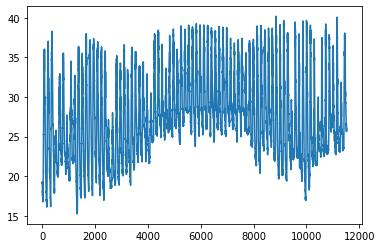

In [32]:
plt.plot(result)
plt.show()

### LSTM

In [33]:

X_train = concat_data.iloc[:4752,]
test = concat_data.iloc[4752:,]

# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가 
X_train = (X_train - MEAN) / (STD + 1e-07)

# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 
def convert_to_timeseries(df, interval):
    sequence_list = [] 
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list) 
    target = np.array(target_list)
    
    return sequence, target

y_columns = ['Y12','Y13']

# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0, 12, 40))
target = np.empty((0,))
for column in y_columns :
    
    concat = pd.concat([X_train, train[column]], axis = 1)

    _sequence, _target = convert_to_timeseries(concat.head(144*30), interval = 12)

    sequence = np.vstack((sequence, _sequence))
    target = np.hstack((target, _target))
    
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
X_train['dummy'] = 0

# train set에서 도출된 평균과 표준편차로 standardization 실시 
test = (test - MEAN) / (STD + 1e-07)

# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
test['dummy'] = 0

# train과 test 기간을 합쳐서 120분 간격으로 학습데이터 재구축
X_test, _ = convert_to_timeseries(pd.concat([X_train, test], axis = 0), interval=12)

# test set 기간인 후반부 80일에 맞게 자르기 
X_test = X_test[-11520:, :, :]

# 만들어 두었던 dummy feature 제거
X_train.drop('dummy', axis = 1, inplace = True)
test.drop('dummy', axis = 1, inplace = True)
import tensorflow as tf

simple_lstm_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=sequence.shape[-2:],
                                             dropout=0.5,
                     recurrent_dropout=0.5),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_4.compile(optimizer='adam', loss='mse')

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if(logs.get('loss') <4):
            print('\n Loss is under 4, cancelling training')
            self.model.stop_training = True
            
callbacks = myCallback()

100%|██████████████████████████████████████████████████████████████████████████| 16260/16260 [00:05<00:00, 2776.00it/s]


In [34]:
# 모델 학습
hist = simple_lstm_model_4.fit(    
    sequence, target,
    epochs=120,
    batch_size=128,
    verbose=2,
    shuffle=False,
    callbacks = [callbacks],
    validation_split = 0.2
)

Train on 6892 samples, validate on 1724 samples
Epoch 1/60
6892/6892 - 3s - loss: 276.9280 - val_loss: 36.1180
Epoch 2/60
6892/6892 - 1s - loss: 29.7693 - val_loss: 9.7857
Epoch 3/60
6892/6892 - 1s - loss: 16.2337 - val_loss: 7.6838
Epoch 4/60
6892/6892 - 1s - loss: 13.2566 - val_loss: 5.9850
Epoch 5/60
6892/6892 - 1s - loss: 10.5072 - val_loss: 5.2146
Epoch 6/60
6892/6892 - 1s - loss: 9.4897 - val_loss: 4.5672
Epoch 7/60
6892/6892 - 1s - loss: 8.7976 - val_loss: 4.0774
Epoch 8/60
6892/6892 - 1s - loss: 8.0812 - val_loss: 3.9083
Epoch 9/60
6892/6892 - 1s - loss: 7.7979 - val_loss: 3.7926
Epoch 10/60
6892/6892 - 1s - loss: 7.5066 - val_loss: 3.5525
Epoch 11/60
6892/6892 - 1s - loss: 7.0591 - val_loss: 3.4236
Epoch 12/60
6892/6892 - 1s - loss: 6.6962 - val_loss: 3.6135
Epoch 13/60
6892/6892 - 1s - loss: 6.7226 - val_loss: 3.4479
Epoch 14/60
6892/6892 - 1s - loss: 6.3714 - val_loss: 3.3877
Epoch 15/60
6892/6892 - 1s - loss: 6.3236 - val_loss: 3.4044
Epoch 16/60
6892/6892 - 1s - loss: 6.12

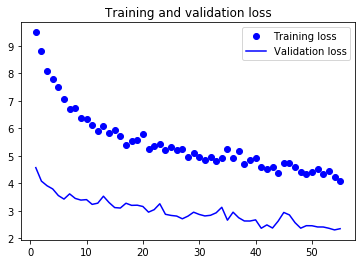

In [35]:
# 시각화
import matplotlib.pyplot as plt

loss = hist.history['loss'][5:]
val_loss = hist.history['val_loss'][5:]

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

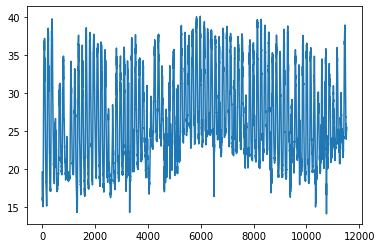

In [36]:
plt.plot(simple_lstm_model_4.predict(X_test))
plt.show()

# lookback 144

In [37]:

X_train = concat_data.iloc[:4752,]
test = concat_data.iloc[4752:,]

# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가 
X_train = (X_train - MEAN) / (STD + 1e-07)

# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 
def convert_to_timeseries(df, interval):
    sequence_list = [] 
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list) 
    target = np.array(target_list)
    
    return sequence, target

y_columns = ['Y12','Y13']

# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0, 144, 40))
target = np.empty((0,))
for column in y_columns :
    
    concat = pd.concat([X_train, train[column]], axis = 1)

    _sequence, _target = convert_to_timeseries(concat.head(144*30), interval = 144)

    sequence = np.vstack((sequence, _sequence))
    target = np.hstack((target, _target))
    
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
X_train['dummy'] = 0

# train set에서 도출된 평균과 표준편차로 standardization 실시 
test = (test - MEAN) / (STD + 1e-07)

# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성
test['dummy'] = 0

# train과 test 기간을 합쳐서 120분 간격으로 학습데이터 재구축
X_test, _ = convert_to_timeseries(pd.concat([X_train, test], axis = 0), interval=144)

# test set 기간인 후반부 80일에 맞게 자르기 
X_test = X_test[-11520:, :, :]

# 만들어 두었던 dummy feature 제거
X_train.drop('dummy', axis = 1, inplace = True)
test.drop('dummy', axis = 1, inplace = True)

100%|██████████████████████████████████████████████████████████████████████████| 16128/16128 [00:06<00:00, 2482.90it/s]


Train on 6681 samples, validate on 1671 samples
Epoch 1/60
6681/6681 - 12s - loss: 293.9832 - val_loss: 28.4718
Epoch 2/60
6681/6681 - 9s - loss: 24.9877 - val_loss: 8.1058
Epoch 3/60
6681/6681 - 9s - loss: 12.6744 - val_loss: 7.0632
Epoch 4/60
6681/6681 - 9s - loss: 10.4386 - val_loss: 5.9559
Epoch 5/60
6681/6681 - 9s - loss: 9.4163 - val_loss: 4.6908
Epoch 6/60
6681/6681 - 9s - loss: 8.8634 - val_loss: 4.5750
Epoch 7/60
6681/6681 - 9s - loss: 8.0839 - val_loss: 4.3179
Epoch 8/60
6681/6681 - 9s - loss: 7.4196 - val_loss: 4.1580
Epoch 9/60
6681/6681 - 10s - loss: 7.5971 - val_loss: 3.8310
Epoch 10/60
6681/6681 - 9s - loss: 6.6815 - val_loss: 3.7918
Epoch 11/60
6681/6681 - 10s - loss: 6.5288 - val_loss: 3.5171
Epoch 12/60
6681/6681 - 9s - loss: 6.3564 - val_loss: 3.4166
Epoch 13/60
6681/6681 - 10s - loss: 6.1669 - val_loss: 3.5158
Epoch 14/60
6681/6681 - 9s - loss: 6.2247 - val_loss: 3.2673
Epoch 15/60
6681/6681 - 10s - loss: 5.9697 - val_loss: 3.2702
Epoch 16/60
6681/6681 - 9s - loss: 

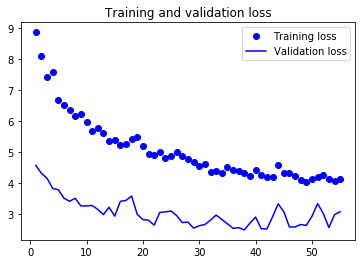

In [38]:
simple_lstm_model_7 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=sequence.shape[-2:],
                                             dropout=0.5,
                     recurrent_dropout=0.5),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_7.compile(optimizer='adam', loss='mse')
# 모델 학습
hist = simple_lstm_model_7.fit(    
    sequence, target,
    epochs=60,
    batch_size=128,
    verbose=2,
    shuffle=False,
    callbacks = [callbacks],
    validation_split = 0.2
)

# 시각화
loss = hist.history['loss'][5:]
val_loss = hist.history['val_loss'][5:]

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

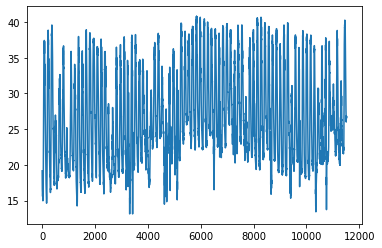

In [39]:
plt.plot(simple_lstm_model_7.predict(X_test))
plt.show()

# 모델 검증 

# 예측

# submission 만들기